In [1]:
import pandas as pd
import numpy as np


In [2]:

data_stack = {
    "Country": ["USA", "USA", "Germany", "Germany", "Japan", "Japan"],
    "Year": [2020, 2021, 2020, 2021, 2020, 2021],
    "Population": [331, 332, 83, 84, 126, 125],
    "GDP": [21137, 22940, 3845, 4223, 5065, 5315]
}
df_stack = pd.DataFrame(data_stack)


data_pivot = {
    "Country": ["USA", "USA", "Germany", "Germany", "Japan", "Japan"],
    "Year": [2020, 2021, 2020, 2021, 2020, 2021],
    "Product": ["A", "B", "A", "B", "A", "B"],
    "Sales": [500, 700, 300, 400, 200, 300]
}
df_pivot = pd.DataFrame(data_pivot)


data_multiindex = {
    "Region": ["North America", "North America", "Europe", "Europe", "Asia", "Asia"],
    "Product": ["A", "B", "A", "B", "A", "B"],
    "Sales": [500, 700, 300, 400, 200, 300],
    "Profit": [200, 300, 100, 150, 50, 75]
}
df_multiindex = pd.DataFrame(data_multiindex)

In [26]:
stacked_df = df_stack.set_index(["Country", "Year"]).stack()
stacked_df

Country  Year            
USA      2020  Population      331
               GDP           21137
         2021  Population      332
               GDP           22940
Germany  2020  Population       83
               GDP            3845
         2021  Population       84
               GDP            4223
Japan    2020  Population      126
               GDP            5065
         2021  Population      125
               GDP            5315
dtype: int64

In [16]:
df = df_stack.unstack()
df

Country     0        USA
            1        USA
            2    Germany
            3    Germany
            4      Japan
            5      Japan
Year        0       2020
            1       2021
            2       2020
            3       2021
            4       2020
            5       2021
Population  0        331
            1        332
            2         83
            3         84
            4        126
            5        125
GDP         0      21137
            1      22940
            2       3845
            3       4223
            4       5065
            5       5315
dtype: object

In [17]:
df_pivot.pivot_table(aggfunc="sum", values="Sales", index="Country", columns="Year")

Year,2020,2021
Country,,
Germany,300,400
Japan,200,300
USA,500,700


In [18]:
df_pivot.pivot_table(aggfunc="sum", values="Sales", index="Country", columns="Year", margins=True)

Year,2020,2021,All
Country,,,
Germany,300,400,700
Japan,200,300,500
USA,500,700,1200
All,1000,1400,2400


In [20]:
df_multiindex = df_multiindex.reset_index()


,index,Region,Product,Sales,Profit
0,0,North America,A,500,200
1,1,North America,B,700,300
2,2,Europe,A,300,100
3,3,Europe,B,400,150
4,4,Asia,A,200,50
5,5,Asia,B,300,75


In [25]:
tupla = df_multiindex.columns
pd.MultiIndex.from_frame(df_multiindex, names=tupla, sortorder=3)

MultiIndex([('North America', 'A', 500, 200),
            ('North America', 'B', 700, 300),
            (       'Europe', 'A', 300, 100),
            (       'Europe', 'B', 400, 150),
            (         'Asia', 'A', 200,  50),
            (         'Asia', 'B', 300,  75)],
           names=['Region', 'Product', 'Sales', 'Profit'])

<Axes: title={'center': 'Sales by Country and Year'}, xlabel='Country'>

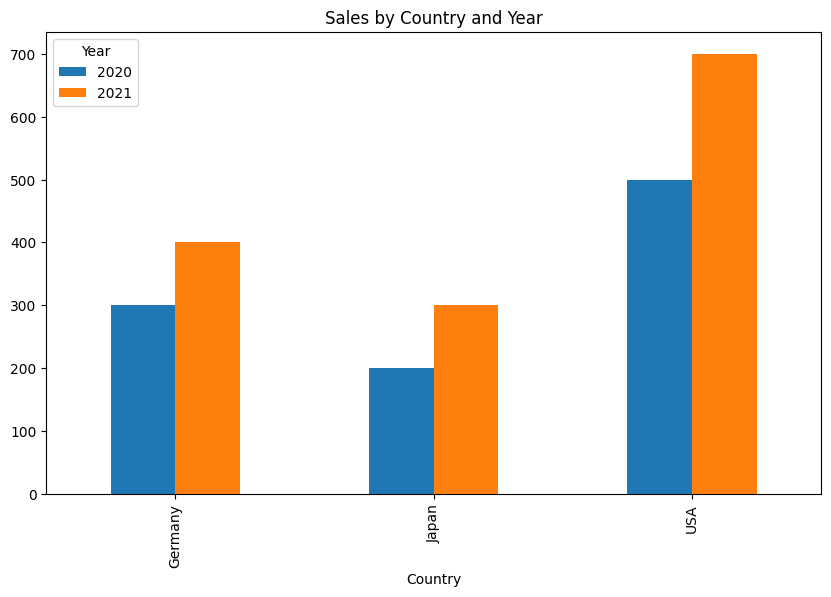

In [28]:
pivot_table = df_pivot.pivot_table(aggfunc="sum", values="Sales", index="Country", columns="Year")
pivot_table.plot(kind="bar", figsize=(10, 6), title="Sales by Country and Year")


In [45]:
t = np.arange(1,13)
t = t.reshape((3,4))
t = t.reshape((2,2,3))
t

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [37]:
t1 = np.arange(1,7).reshape((2,3))
print(t1)
t2 = np.arange(7,13).reshape((2,3))
print(t2)
t3 = np.concatenate((t1,t2), axis=1)
t4 = np.concatenate((t1,t2), axis=0)
print("t3----")
print(t3)
print("t4-----")
print(t4)

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
t3----
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
t4-----
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [51]:
t = t.reshape((3,4))
t_split = np.array_split(t,2, axis=0)
print(t_split)
t_5 = np.split(t, 4, axis=1)
t_5

[array([[1, 2, 3, 4],
       [5, 6, 7, 8]]), array([[ 9, 10, 11, 12]])]


[array([[1],
        [5],
        [9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]]),
 array([[ 4],
        [ 8],
        [12]])]

In [68]:
arr = np.random.randint(1,20, (3,2,2))
arr_t = np.transpose(arr, (2,0,1))
arr_t

array([[[18, 16],
        [ 7,  7],
        [13,  3]],

       [[ 5,  3],
        [11,  2],
        [15,  3]]])

In [59]:
arr_ravel = np.ravel(arr)
arr_ravel

array([10, 16,  1, 14, 18,  7, 16,  3, 13,  4, 14,  7])

In [67]:
t1d = np.array([1,2,3,4])
t141 = np.expand_dims(t1d, axis=(0,1))
t141.shape

(1, 1, 4)